In [1]:
import numpy as np
import matplotlib.pyplot as plt
import dynesty
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import pandas

In [2]:
tim, fl, fle = np.loadtxt('Data/residuals.dat', usecols=(0,1,2), unpack=True)
dta = {'tim':tim, 'fl':fl, 'fle':fle}
df = pandas.DataFrame(data=dta)

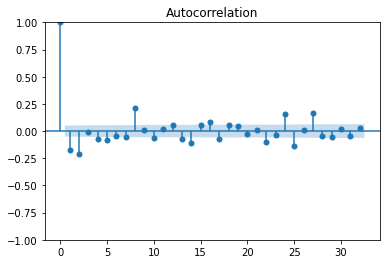

In [3]:
plot_acf(df.fl);

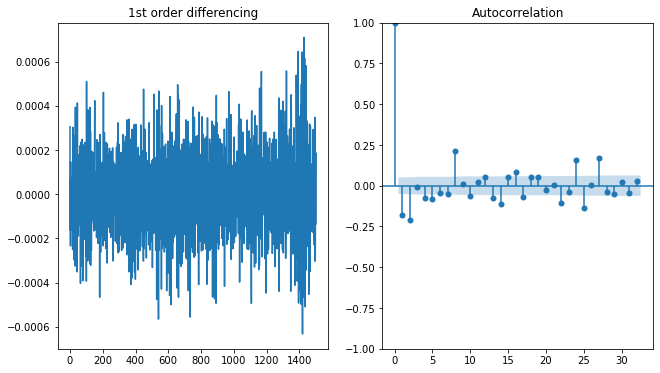

In [4]:
f = plt.figure(figsize=(16/1.5, 9/1.5))

ax1 = f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df.fl)

ax2 = f.add_subplot(122)
plot_acf(df.fl.dropna(), ax=ax2);

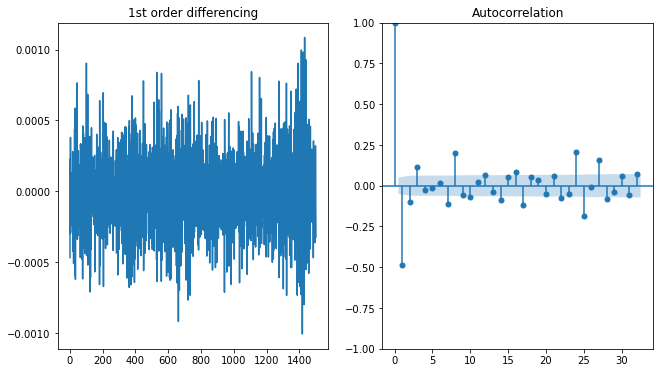

In [5]:
f = plt.figure(figsize=(16/1.5, 9/1.5))

ax1 = f.add_subplot(121)
ax1.set_title('1st order differencing')
ax1.plot(df.fl.diff())

ax2 = f.add_subplot(122)
plot_acf(df.fl.diff().dropna(), ax=ax2);

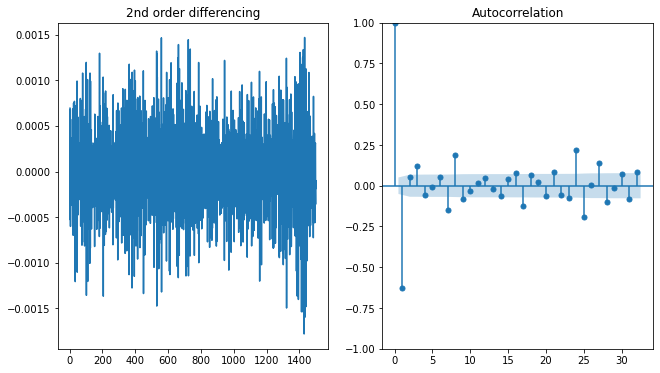

In [6]:
f = plt.figure(figsize=(16/1.5, 9/1.5))

ax1 = f.add_subplot(121)
ax1.set_title('2nd order differencing')
ax1.plot(df.fl.diff().diff())

ax2 = f.add_subplot(122)
plot_acf(df.fl.diff().diff().dropna(), ax=ax2);

In [7]:
res = adfuller(df.fl.dropna())
print('p-value: ', res[1])

res = adfuller(df.fl.diff().dropna())
print('p-value: ', res[1])

res = adfuller(df.fl.diff().diff().dropna())
print('p-value: ', res[1])

p-value:  2.7523185212366214e-24
p-value:  2.8856254384897076e-30
p-value:  0.0


/Users/japa6985/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


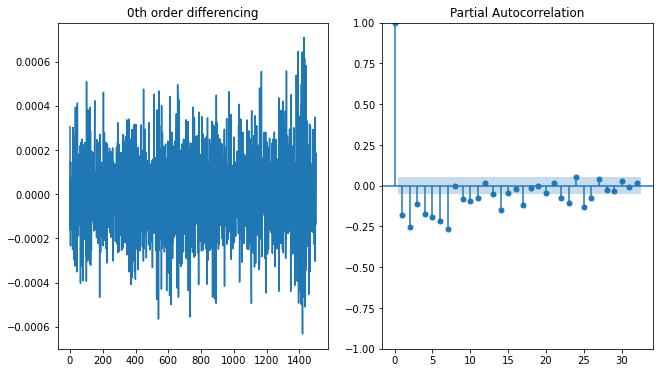

In [8]:
f = plt.figure(figsize=(16/1.5, 9/1.5))

ax1 = f.add_subplot(121)
ax1.set_title('0th order differencing')
ax1.plot(df.fl)

ax2 = f.add_subplot(122)
plot_pacf(df.fl.dropna(), ax=ax2);

In [9]:
arima_model = ARIMA(df.fl, order=(7,0,7))
model = arima_model.fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                     fl   No. Observations:                 1502
Model:                 ARIMA(7, 0, 7)   Log Likelihood               10995.286
Date:                Thu, 11 Aug 2022   AIC                         -21958.573
Time:                        22:56:06   BIC                         -21873.540
Sample:                             0   HQIC                        -21926.897
                               - 1502                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.884e-08   5.54e-07      0.160      0.873   -9.98e-07    1.18e-06
ar.L1         -0.4369      0.012    -37.774      0.000      -0.460      -0.414
ar.L2         -0.6948      0.012    -58.162      0.0

/Users/japa6985/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


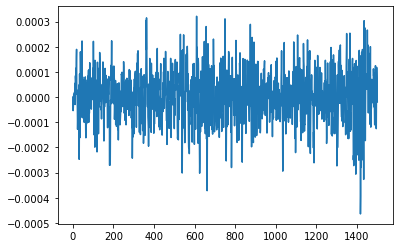

In [10]:
pred = model.predict(dynamic=False)
plt.plot(pred)

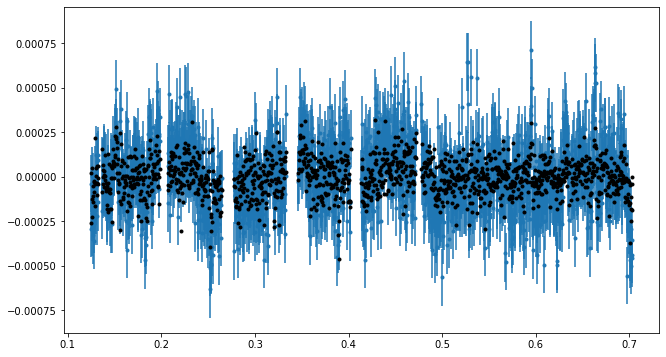

In [11]:
plt.figure(figsize=(16/1.5, 9/1.5))
plt.errorbar(tim, fl, yerr=fle, fmt='.')
plt.plot(tim, pred, 'k.', zorder=10)

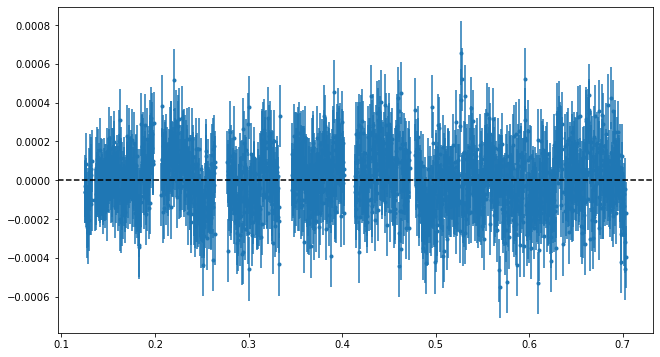

In [12]:
resid = fl-pred
plt.figure(figsize=(16/1.5, 9/1.5))
plt.errorbar(tim, resid, yerr=fle, fmt='.')
plt.axhline(0.0, color='k', ls='--', zorder=10)